In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar
import numpy as np

# Load dataset (replace with your actual filename if different)
ds = xr.open_dataset("ghana_era5_2mtemp_1991_2024.nc")

# Inspect variable names
(ds)

<xarray.Dataset>
Dimensions:     (valid_time: 408, latitude: 29, longitude: 21)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 1991-01-01 1991-02-01 ... 2024-12-01
  * latitude    (latitude) float64 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * longitude   (longitude) float64 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
    expver      (valid_time) object ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [3]:
# Convert from Kelvin to Celsius
t2m_celsius = ds['t2m'] - 273.15

In [4]:
t2m_celsius

<xarray.DataArray 't2m' (valid_time: 408, latitude: 29, longitude: 21)>
array([[[27.163849, 27.462677, 27.68924 , ..., 28.450958, 28.454865,
         28.443146],
        [27.40799 , 27.425568, 27.654083, ..., 28.656036, 28.585724,
         28.56424 ],
        [27.429474, 27.447052, 27.656036, ..., 28.741974, 28.671661,
         27.699005],
        ...,
        [26.982208, 26.947052, 26.681427, ..., 27.505646, 27.499786,
         27.491974],
        [26.999786, 26.968536, 26.974396, ..., 27.49588 , 27.491974,
         27.509552],
        [27.029083, 27.02713 , 27.031036, ..., 27.474396, 27.488068,
         27.503693]],

       [[29.667145, 29.95816 , 30.21988 , ..., 31.815582, 31.883942,
         31.90738 ],
        [29.77066 , 29.872223, 30.135895, ..., 31.881989, 31.811676,
         31.825348],
        [29.692535, 29.796051, 30.012848, ..., 31.825348, 31.755035,
         30.86441 ],
...
        [27.593597, 27.583832, 27.35141 , ..., 27.777191, 27.76352 ,
         27.749847],
        [27.427582, 27.421722, 27.441254, ..., 27.691254, 27.679535,
         27.681488],
        [27.355316, 27.365082, 27.384613, ..., 27.60141 , 27.591644,
         27.589691]],

       [[26.42862 , 26.48526 , 26.26651 , ..., 26.870026, 26.707916,
         26.82901 ],
        [26.899323, 27.069244, 26.858307, ..., 26.684479, 26.664948,
         26.770416],
        [26.586823, 26.756744, 26.920807, ..., 26.782135, 26.76065 ,
         25.92862 ],
        ...,
        [27.83487 , 27.815338, 27.61612 , ..., 28.276276, 28.248932,
         28.213776],
        [27.821198, 27.805573, 27.821198, ..., 28.286041, 28.258698,
         28.23526 ],
        [27.819244, 27.809479, 27.825104, ..., 28.268463, 28.243073,
         28.219635]]], dtype=float32)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 1991-01-01 1991-02-01 ... 2024-12-01
  * latitude    (latitude) float64 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * longitude   (longitude) float64 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
    expver      (valid_time) object ...

In [5]:
# Spatial average over Ghana
ghana_temp = t2m_celsius.mean(dim=["latitude", "longitude"])

# Convert to pandas Series
temp_series = ghana_temp.to_series()

In [6]:
ghana_temp

<xarray.DataArray 't2m' (valid_time: 408)>
array([27.265959, 28.902672, 28.938286, 28.296333, 26.932737, 26.710735,
       25.191717, 24.561121, 25.494217, 25.413809, 26.645462, 26.262886,
       26.225872, 28.67541 , 29.577425, 28.96145 , 27.507093, 25.945444,
       24.586412, 24.406038, 24.938725, 26.16265 , 26.108192, 26.61661 ,
       26.073183, 28.489231, 28.545242, 29.104065, 28.327663, 26.583183,
       25.129631, 24.93088 , 25.264448, 26.531593, 27.490309, 26.720161,
       26.864416, 28.650381, 29.47397 , 29.07891 , 27.812708, 26.303505,
       25.179232, 24.843143, 25.196999, 25.706226, 26.604084, 26.342445,
       26.533848, 28.255417, 29.407064, 28.974337, 28.023724, 26.813305,
       25.468937, 24.926435, 25.2739  , 25.95614 , 26.50767 , 26.766895,
       27.267202, 28.538277, 29.217314, 28.643576, 28.06484 , 26.261032,
       25.374554, 24.754316, 24.853304, 25.800283, 26.43198 , 26.611408,
       27.38034 , 27.952763, 28.990982, 28.193163, 27.39639 , 26.079594,
       25.242   , 25.052483, 25.909727, 26.821846, 27.420095, 27.125212,
       27.44751 , 29.751732, 30.564854, 30.326157, 28.815334, 26.856693,
       25.688004, 24.880411, 25.314156, 26.324238, 27.450428, 27.015398,
       27.395372, 28.111979, 29.56851 , 28.735882, 27.725328, 26.700594,
       25.13932 , 24.46045 , 24.600725, 25.401896, 26.671719, 26.24637 ,
       27.323046, 27.355696, 29.557652, 29.565184, 28.246664, 26.240833,
       25.277334, 24.75771 , 25.24758 , 26.125032, 27.276445, 26.554228,
...
       26.166916, 25.488379, 25.88219 , 27.112434, 27.744286, 26.543245,
       27.570543, 29.427725, 30.123075, 30.002401, 28.658655, 26.973598,
       25.885763, 25.567493, 25.896366, 27.34281 , 28.436365, 27.957096,
       27.862665, 29.395487, 30.388662, 29.854094, 28.504936, 26.91228 ,
       25.887148, 25.288292, 25.93672 , 27.393711, 27.714537, 27.509287,
       27.120356, 29.469893, 29.568356, 29.420923, 28.238386, 26.933104,
       25.788158, 25.479433, 25.893332, 26.945883, 27.954071, 27.378313,
       28.200504, 29.387495, 30.242153, 30.129246, 28.767267, 27.218208,
       25.99044 , 25.667168, 26.054085, 26.345356, 28.118149, 27.703892,
       27.693054, 29.470598, 30.386738, 29.790884, 28.897821, 27.070055,
       25.812647, 25.475328, 25.700184, 26.715437, 27.931576, 28.026947,
       28.241638, 29.322407, 29.92779 , 30.19431 , 29.09609 , 27.293613,
       26.142866, 25.643175, 26.151356, 27.383915, 28.099812, 27.824347,
       27.59751 , 29.161972, 30.14525 , 28.988487, 28.252848, 26.728382,
       25.765438, 25.08976 , 25.250805, 26.685762, 27.484108, 27.135416,
       27.685024, 29.436499, 29.635193, 29.539268, 28.89557 , 27.040531,
       26.399147, 25.76169 , 26.385984, 27.412779, 28.5392  , 27.667309,
       28.405087, 30.042582, 31.08727 , 30.583231, 29.635988, 27.650688,
       26.286375, 25.700329, 26.108543, 26.819267, 27.656517, 27.47858 ],
      dtype=float32)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 1991-01-01 1991-02-01 ... 2024-12-01
    expver      (valid_time) object ...

In [7]:
temp_series

valid_time
1991-01-01    27.265959
1991-02-01    28.902672
1991-03-01    28.938286
1991-04-01    28.296333
1991-05-01    26.932737
                ...    
2024-08-01    25.700329
2024-09-01    26.108543
2024-10-01    26.819267
2024-11-01    27.656517
2024-12-01    27.478580
Name: t2m, Length: 408, dtype: float32

In [8]:
# Mann-Kendall test on monthly data
mk_result = mk.original_test(temp_series)

print("Trend:", mk_result.trend)
print("Tau:", mk_result.Tau)
print("P-value:", mk_result.p)

Trend: increasing
Tau: 0.13860384448619742
P-value: 2.8999235234916654e-05


In [9]:
# Resample to annual averages
annual_temp = temp_series.resample('Y').mean()

# Mann-Kendall test on annual data
mk_annual = mk.original_test(annual_temp)

print("Annual Trend:", mk_annual.trend)
print("Tau:", mk_annual.Tau)
print("P-value:", mk_annual.p)

Annual Trend: increasing
Tau: 0.7433155080213903
P-value: 6.961164977781209e-10


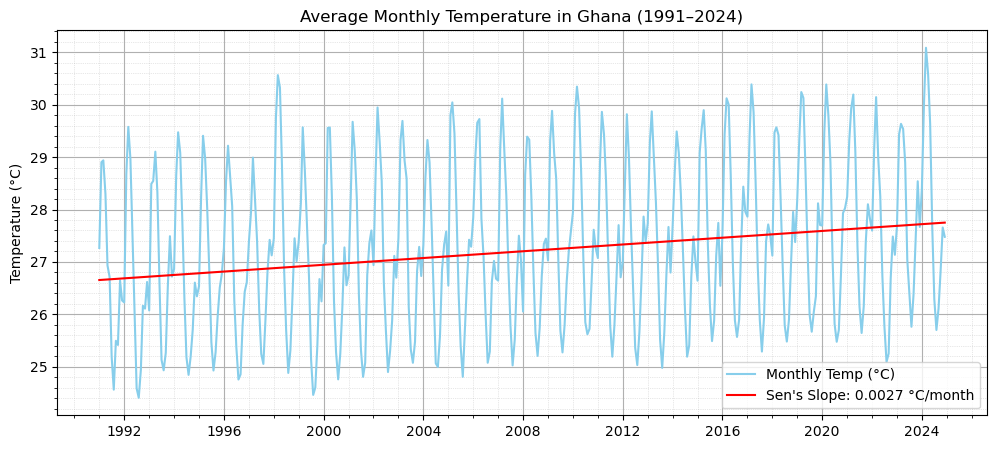

In [10]:
# Compute Sen's slope
result_monthly = mk.sens_slope(temp_series)

# Recreate monthly plot
plt.figure(figsize=(12, 5))
plt.plot(temp_series.index, temp_series.values, label='Monthly Temp (°C)', color='skyblue')

# Plot Sen's slope line
x_vals = np.arange(len(temp_series))
slope_line = result_monthly.slope * x_vals + result_monthly.intercept
plt.plot(temp_series.index, slope_line, label=f"Sen's Slope: {result_monthly.slope:.4f} °C/month", color='red')

# Formatting
plt.title("Average Monthly Temperature in Ghana (1991–2024)")
plt.ylabel("Temperature (°C)")
plt.grid(True, which='major')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.6)
plt.legend()
plt.savefig("Monthly_temperature_trend.png", dpi=300, bbox_inches='tight')
plt.show()


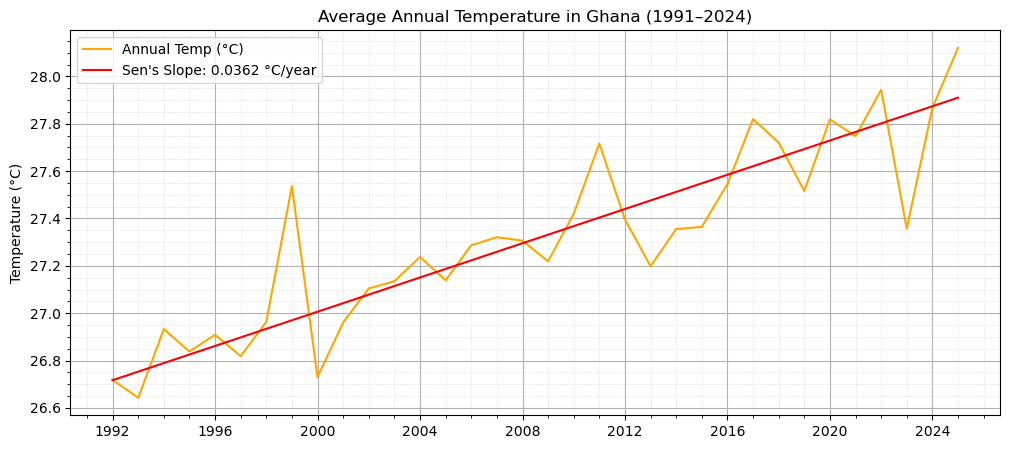

In [11]:
# Compute Sen’s slope on annual data
result_annual = mk.sens_slope(annual_temp)

# Annual plot with trend line
plt.figure(figsize=(12, 5))
plt.plot(annual_temp.index, annual_temp.values, label='Annual Temp (°C)', color='orange')

# Add Sen’s slope line
x_vals = np.arange(len(annual_temp))
slope_line = result_annual.slope * x_vals + result_annual.intercept
plt.plot(annual_temp.index, slope_line, label=f"Sen's Slope: {result_annual.slope:.4f} °C/year", color='red')

plt.title("Average Annual Temperature in Ghana (1991–2024)")
plt.ylabel("Temperature (°C)")
plt.grid(True, which='major')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.6)
plt.legend()
plt.savefig("Annual_temperature_trend.png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# Convert temp_series into a DataFrame
temp_df = temp_series.to_frame(name='temp')

# Extract month and year
temp_df['month'] = temp_df.index.month
temp_df['year'] = temp_df.index.year

# Define function to assign season
def assign_season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    else:
        return 'SON'

# Apply to create a 'season' column
temp_df['season'] = temp_df['month'].apply(assign_season)

# Group by year and season, compute mean temp
seasonal_means = temp_df.groupby(['year', 'season'])['temp'].mean().unstack()


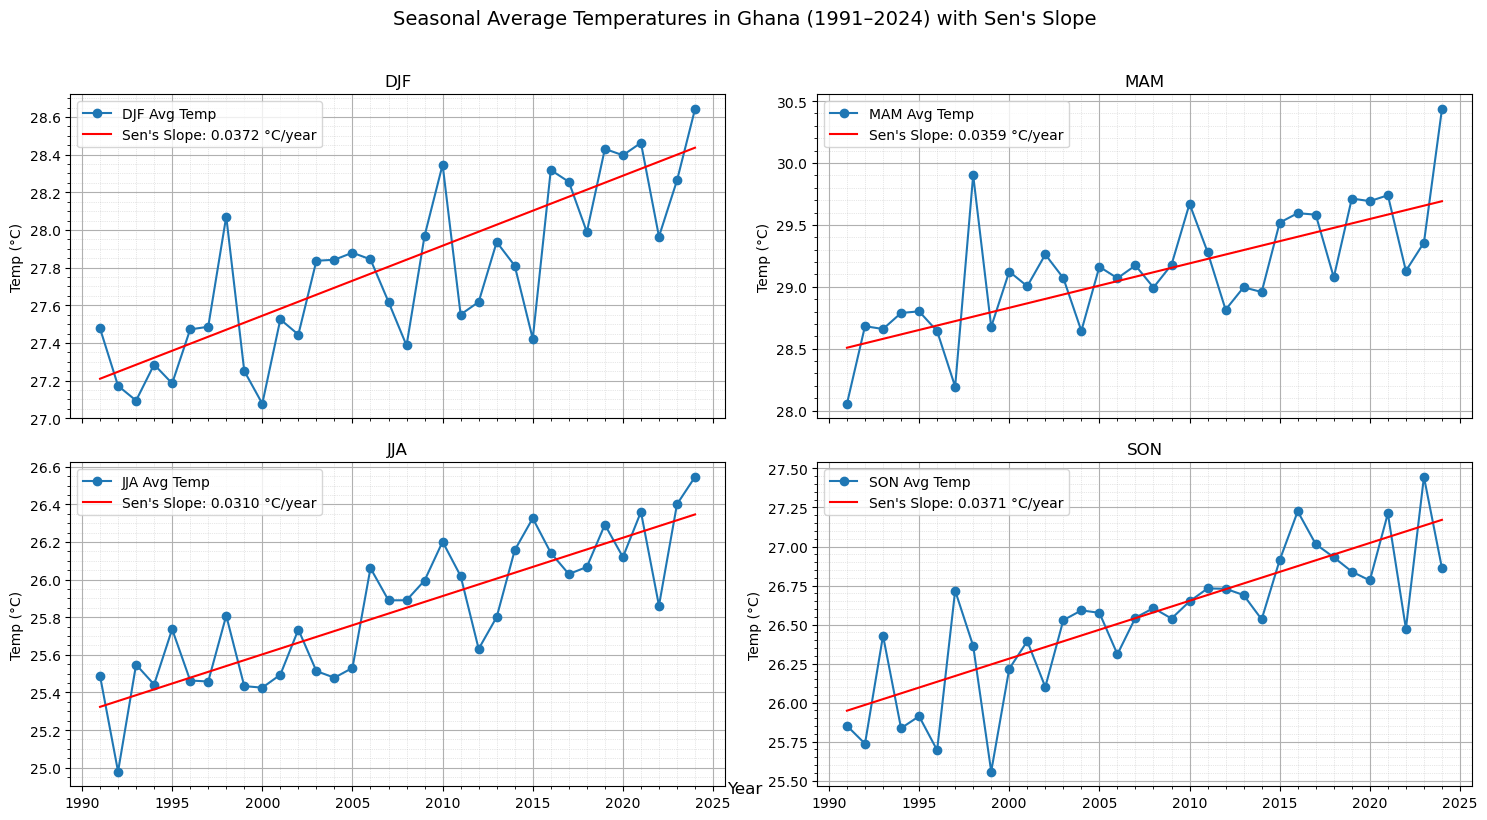

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
seasons = ['DJF', 'MAM', 'JJA', 'SON']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for season, pos in zip(seasons, positions):
    ax = axes[pos]
    season_series = seasonal_means[season].dropna()

    # Sen's slope
    result_season = mk.sens_slope(season_series)
    x_vals = np.arange(len(season_series))
    slope_line = result_season.slope * x_vals + result_season.intercept

    ax.plot(season_series.index, season_series.values, label=f'{season} Avg Temp', marker='o')
    ax.plot(season_series.index, slope_line, label=f"Sen's Slope: {result_season.slope:.4f} °C/year", color='red')

    ax.set_title(f'{season}', fontsize=12)
    ax.set_ylabel("Temp (°C)")
    ax.grid(True, which='major')
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.6)
    ax.legend()

fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.suptitle("Seasonal Average Temperatures in Ghana (1991–2024) with Sen's Slope", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("Season_temperature_trend.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
# Rename valid_time to time
t2m_celsius = ds['t2m'] - 273.15
t2m_celsius = t2m_celsius.rename({'valid_time': 'time'})

In [15]:
# Convert to datetime (if not already)
t2m_celsius['time'] = pd.to_datetime(t2m_celsius['time'].values)

In [16]:
# Load and prepare
ds = xr.open_dataset("ghana_era5_2mtemp_1991_2024.nc")
t2m_celsius = ds['t2m'] - 273.15
t2m_celsius = t2m_celsius.rename({'valid_time': 'time'})
t2m_celsius['time'] = pd.to_datetime(t2m_celsius['time'].values)

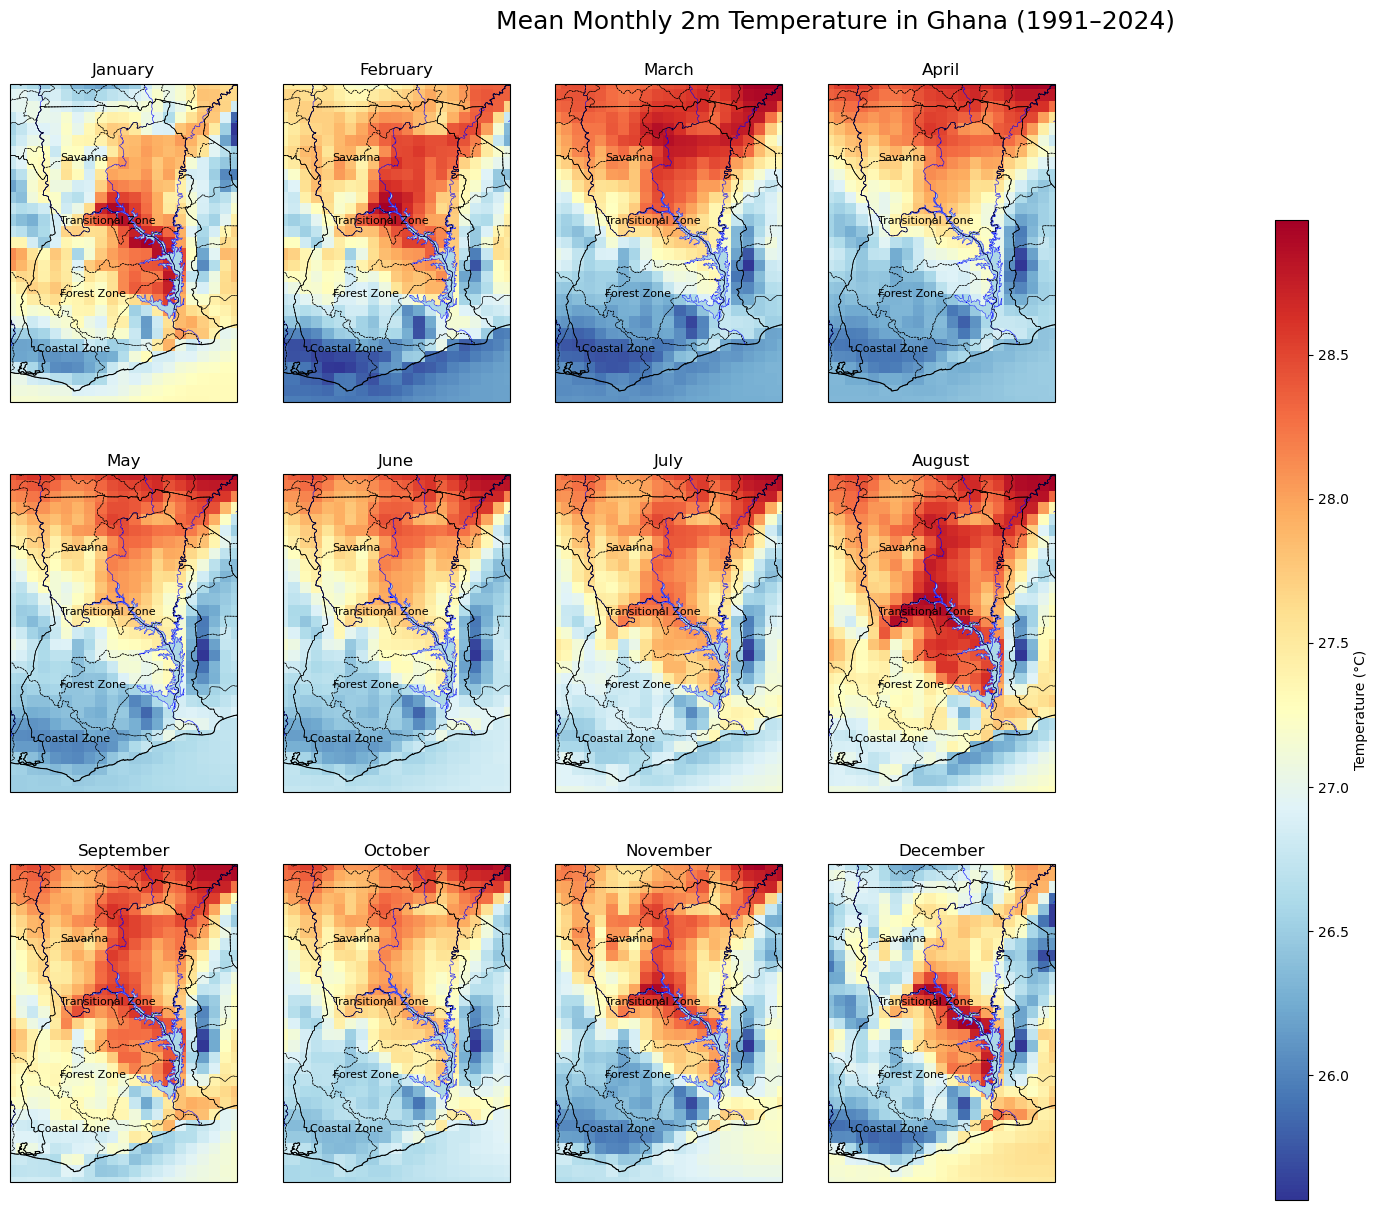

In [17]:
# Create subplots (3 rows × 4 columns for 12 months)
fig, axes = plt.subplots(3, 4, figsize=(22, 14), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Mean Monthly 2m Temperature in Ghana (1991–2024)", fontsize=18, y=0.95)

for month in range(1, 13):
    row = (month - 1) // 4
    col = (month - 1) % 4
    ax = axes[row][col]

    # Monthly mean
    monthly_mean = t2m_celsius.sel(time=t2m_celsius['time.month'] == month).mean(dim='time')

    # Plot map
    im = monthly_mean.plot(ax=ax, cmap="RdYlBu_r", add_colorbar=False)

    ax.set_title(calendar.month_name[month], fontsize=12)
    ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())

    # Add geographic features
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='blue', linewidth=0.3)
    ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.4)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.4, linestyle='--')

    # Add climate zone 
    ax.text(-2.9, 5.6, 'Coastal Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 6.8, 'Forest Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 8.4, 'Transitional Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 9.8, 'Savanna', fontsize=8, transform=ccrs.PlateCarree())

# Add shared colorbar
cbar_ax = fig.add_axes([0.7, 0.1, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Temperature (°C)')

plt.subplots_adjust(top=0.9, right=0.6)
plt.savefig("Spatialplot_mean_monthly.png", dpi=300, bbox_inches='tight')
plt.show()

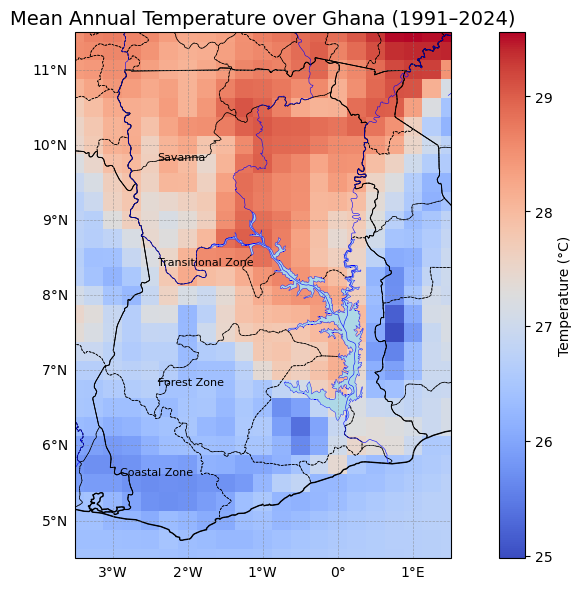

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Compute annual mean
annual_mean = t2m_celsius.groupby("time.year").mean(dim="time")
overall_annual_mean = annual_mean.mean(dim="year")

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot data
overall_annual_mean.plot(
    ax=ax,
    cmap="coolwarm",
    cbar_kwargs={'label': 'Temperature (°C)'},
    transform=ccrs.PlateCarree()
)

# Set title
ax.set_title("Mean Annual Temperature over Ghana (1991–2024)", fontsize=14)

# Add geographic features
ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.7, linestyle='-')
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5, linestyle='--')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='blue', linewidth=0.3)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.4)

# Add minor gridlines (simulated by finer major grids)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.6, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add climate zone rectangles and labels (approximated)

ax.text(-2.9, 5.6, 'Coastal Zone', fontsize=8, transform=ccrs.PlateCarree())
ax.text(-2.4, 6.8, 'Forest Zone', fontsize=8, transform=ccrs.PlateCarree())
ax.text(-2.4, 8.4, 'Transitional Zone', fontsize=8, transform=ccrs.PlateCarree())
ax.text(-2.4, 9.8, 'Savanna', fontsize=8, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.savefig("Spatialplot_annual_mean.png", dpi=300, bbox_inches='tight')
plt.show()

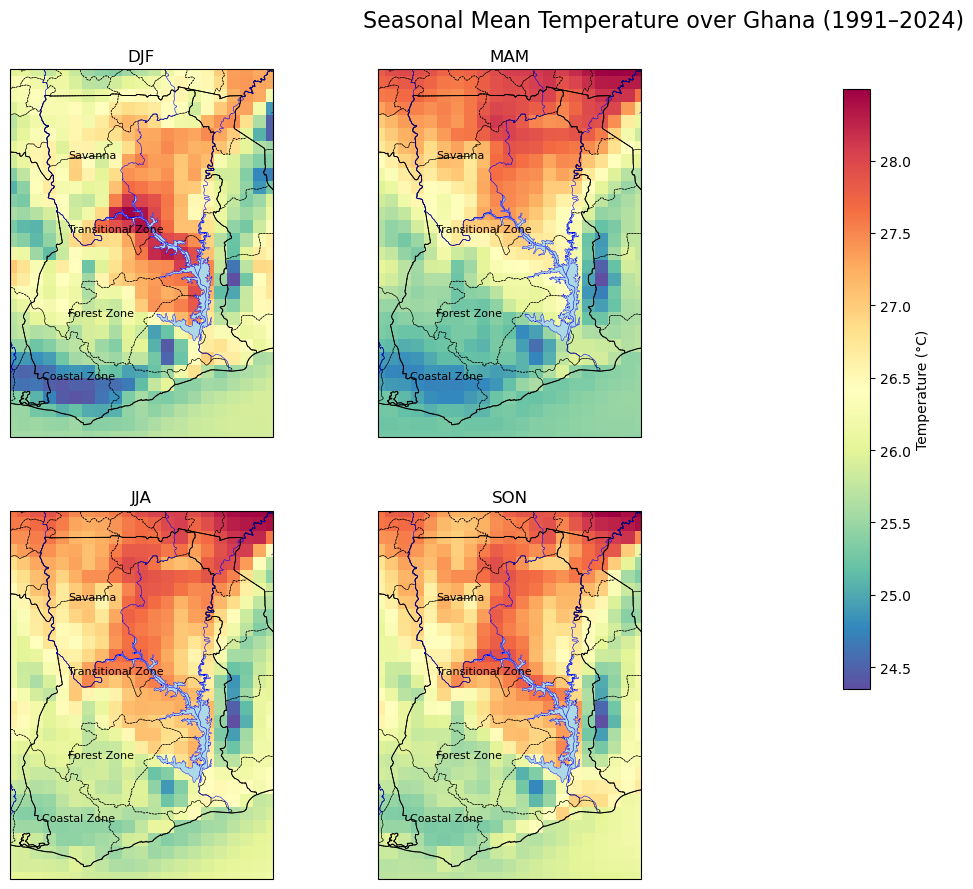

In [19]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    else:
        return 'SON'

# Assign seasons if not already
t2m_celsius.coords['season'] = ('time', [get_season(m) for m in t2m_celsius['time.month'].values])

# Group and average by season
seasonal_means_spatial = t2m_celsius.groupby('season').mean(dim='time')

# Prepare subplots (2x2 for 4 seasons)
fig, axes = plt.subplots(2, 2, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Seasonal Mean Temperature over Ghana (1991–2024)", fontsize=16)

# Map each season to subplot index
seasons = ['DJF', 'MAM', 'JJA', 'SON']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Loop over each season
for season, pos in zip(seasons, positions):
    ax = axes[pos[0]][pos[1]]
    seasonal_mean = seasonal_means_spatial.sel(season=season)

    im = seasonal_mean.plot(
        ax=ax,
        cmap="Spectral_r",
        add_colorbar=False,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(f"{season}", fontsize=12)
    ax.set_extent([-3.5, 1.5, 4.5, 11.5])

    # Add base map features
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.7)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.4, linestyle='--')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='blue', linewidth=0.3)
    ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.4)

    # Add climate zones 
    ax.text(-2.9, 5.6, 'Coastal Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 6.8, 'Forest Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 8.4, 'Transitional Zone', fontsize=8, transform=ccrs.PlateCarree())
    ax.text(-2.4, 9.8, 'Savanna', fontsize=8, transform=ccrs.PlateCarree())

# Add shared colorbar
cbar_ax = fig.add_axes([0.6, 0.3, 0.015, 0.6])
fig.colorbar(im, cax=cbar_ax, label='Temperature (°C)')

plt.subplots_adjust(top=0.92, right=0.5)
plt.savefig("Spatialplot_seasonal_mean.png", dpi=300, bbox_inches='tight')
plt.show()
